<a href="https://colab.research.google.com/github/vinhqngo5/CS112.L11.KHTN_Team011/blob/master/week12/Docs/PhanThuong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>NHÓM 11</h1>
<h1>ĐỀ BÀI: PHẦN THƯỞNG</h1>

Harry và Hermione thắng cuộc trong một trò chơi truyền hình và bây giờ là giai đoạn trao thưởng. Quy tắc trao thưởng là như sau: có $n$ phần thưởng xếp thành một hàng dài, đánh số từ 1 đến $n$. Tùy thuộc vào số điểm đã đạt được của cặp chơi, người dẫn chương trình sẽ nói một số $k (1 ≤ k ≤ n/3)$. Một người chơi sẽ chọn cho mình $k$ phần thưởng xếp liên tiếp nhau, người thứ hai cũng sẽ chọn cho mình $k$ phần thưởng xếp liên tiếp nhau trong số còn lại. Hermione là nữ nên được ưu tiên chọn trước.

Trò chơi đã kết thúc. Bây giờ không cần phải đồng tâm hiệp lực. Hermione vẫn còn rất giận Harry về một câu nói vô tâm mà chắc bây giờ Harry cũng không nhớ là mình nói cái gì và khi nào. Hermione hiểu rất rõ giá trị mỗi phần thưởng đối với Harry, cụ thể là phần thưởng thứ $i$ sẽ có giá trị $a_i$, $i= 1 ÷ n$ và quyết định cách chọn của mình sao cho tổng giá trị phần thưởng mà Harry có thể đạt được càng nhỏ càng tốt. Về tổng giá trị phần thưởng của mình, Hermione không mảy may quan tâm!

Hãy xác định $x$ – tổng nhỏ nhất giá trị phần thưởng mà Hermione có thể chọn để Harry không có cách chọn phần thưởng với tổng giá trị lớn hơn x.

<b>Dữ liệu:</b> Vào từ thiết bị nhập chuẩn 
<ul>
<li>Dòng đầu tiên chứa 2 số nguyên $n$ và $k$ $(3 ≤ n ≤ 10^5, 1 ≤ k ≤ n/3)$ </li>
<li>Dòng thứ 2 chứa $n$ số nguyên $a_1, a_2, . . ., a_n$ $(1 ≤ a_i ≤ 10^9, i = 1 ÷ n)$ </li>
</ul>

<b>Kết quả:</b> Đưa ra thiết bị xuất chuẩn số nguyên $x$.

<img src="https://github.com/vinhqngo5/CS112.L11.KHTN_Team011/blob/master/week12/Docs/images/PhanThuong.JPG?raw=1">

<h2>1. Abstraction</h2>

Cho dãy số $a_1,a_2,...a_n$, chọn $k$ số liên tiếp $(1 ≤ k ≤ n/3)$ sao cho tổng giá trị $(x)$ các số được chọn là nhỏ nhất và không thể chọn $k$ số liên tiếp nào khác có tổng lớn hơn $x$.

<h2>2. Tư duy thuật toán </h2>

Với mỗi đoạn mà Hermione chọn thì mảng ban đầu của chúng ta được phân chia thành 2 phần, phần đầu và phần cuối chưa được Harry chọn, và sẽ chọn $k$ phần tử liên tiếp trong phần đầu hoặc cuối sao cho Harry đạt được tổng giá trị lớn nhất.

<b>Cách ngây thơ: </b>
Ta sẽ cho Hermione chọn đoạn $[i, i + k - 1]$ và Harry sẽ chọn đoạn con có độ dài $k$ có tổng lớn nhất trong hai phần $[1, i-1]$ và $[i + k, n]$ bằng cách sử dụng tổng tiền tố. $\rightarrow$ Độ phức tạp $O(N^2)$

<b>Cách tối ưu:</b>
Ta định nghĩa mảng $f[i]$ là giá trị có tổng lớn nhất của $k$ phần tử liên tiếp trong đoạn $[1, i]$, tương tự với $g[i]$ là giá trị lớn nhất của $k$ phần tử liên tiếp trong đoạn $[i, n]$. Với mỗi đoạn mà Hermione chọn, ta cần tìm đáp án nhỏ nhất trong phương án mà Harry chọn (tổng lớn nhất của hai phần còn lại ~ $max(f[i], g[i + k - 1])$). $\rightarrow$ Độ phức tạp $O(N)$

<h2>3. Pseudocode </h2>

```
nhập input -> n, k, mảng a

chuẩn bị mảng tổng tiền tố s
chuẩn bị max tiền tố f: f[i] = max(f[i-1], s[i] - s[i - k])
chuẩn bị max hậu tố g: g[i] = max(g[i+1], s[i + k - 1] - s[i - 1])

answer = +oo
for i from 1 to n :
    Harry_solution = max(f[i-1], g[i + k)
    # vì Hermione sẽ chọn đoạn từ i đến i - k + 1

    #cập nhật answer theo phương án mà Harry chọn
    answer = min(answer, Harry_solution)

output -> answer

```

<h2>4. Code </h2>

In [1]:
n, k  = map(int, input().split())
a = list(map(int, input().split()))

s = [0] * (n + 1)
f = [0] * (n + 1)
g = [0] * (n + k + 3)

for i in range(n):
    s[i + 1] +=  s[i] + a[i]

for i in range(k, n + 1):
    f[i] = max(f[i-1], s[i] - s[i-k])

for i in range(n - k + 1, 0, -1):
    g[i] = max(g[i + 1], s[i + k -1] - s[i - 1])

ans = 10 ** 16
for i in range(n):
    ans = min(ans, max(f[i], g[i + k + 1]))

print(ans)

10 2
1 2 4 5 2 4 2 2 1 6
7


<h2>5. Kết quả </h2>

Sau đây là kết quả mà bọn em đã submit trên trang web môn học.

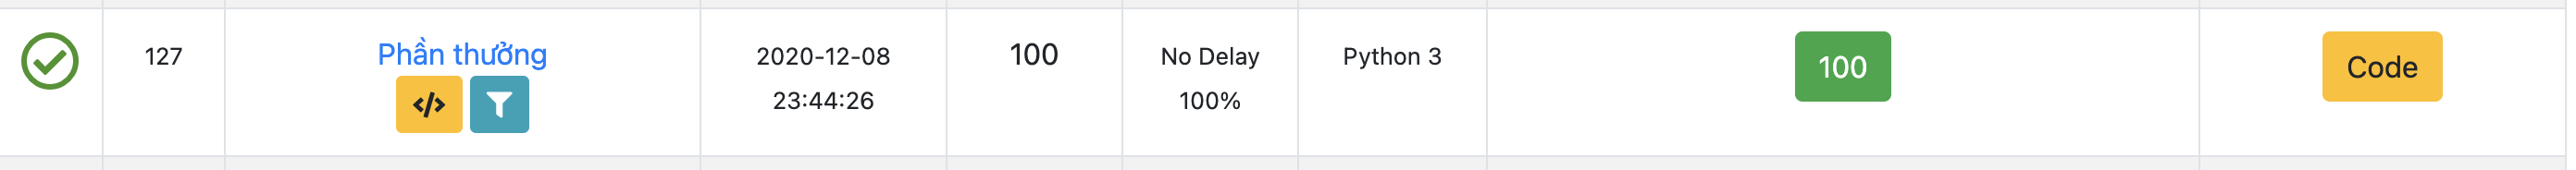